# Search, Problem-Solving, and Planning with Python

This notebook covers the concepts presented in the lecture "Search, Problem Solving, and Planning" by Dr. Dominik Jung. We will dive into the core principles of intelligent agents, search algorithms, and problem-solving techniques, incorporating hands-on examples using Python. The goal of this notebook is to give you practical experience with the algorithms and tools discussed in the lecture, enriched with additional exercises and insights.

### Prerequisites


Let's start with setting up our libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

Then connect our Google Drive with Google Colab *(run only if you using Google Colab)*

In [ ]:
# Acess your files from Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Intelligent Agents
An intelligent agent is an entity that perceives its environment and takes actions to maximize its chances of achieving its goals. Here, we will discuss different types of agents, their characteristics, and how they function.

#### **Agent Types**
- **Simple Reflex Agents**
- **Model-Based Reflex Agents**
- **Goal-Based Agents**
- **Utility-Based Agents**
- **Learning Agents**

##### **Example: Vacuum Cleaner World**
Let’s implement a simple reflex agent for the Vacuum Cleaner World problem.


In [2]:
class VacuumCleanerAgent:
    def __init__(self):
        self.location = "A"
        self.environment = {"A": "Dirty", "B": "Dirty"}

    def perceive(self):
        return self.environment[self.location]

    def act(self):
        if self.perceive() == "Dirty":
            self.environment[self.location] = "Clean"
            return f"Suck dirt at {self.location}"
        else:
            self.location = "B" if self.location == "A" else "A"
            return f"Move to {self.location}"

agent = VacuumCleanerAgent()
for _ in range(5):
    print(agent.act())

Suck dirt at A
Move to B
Suck dirt at B
Move to A
Move to B


### 2. Problem Solving by Searching
Problem-solving in AI often involves searching through a space of possible solutions. We need to define our problem in terms of:
- **Initial State**
- **Actions**
- **Goal State**
- **Path Cost**


#### **Road Trip Planning**
We will model a road trip between multiple national parks as a search problem. We can use graph representations to depict different routes.


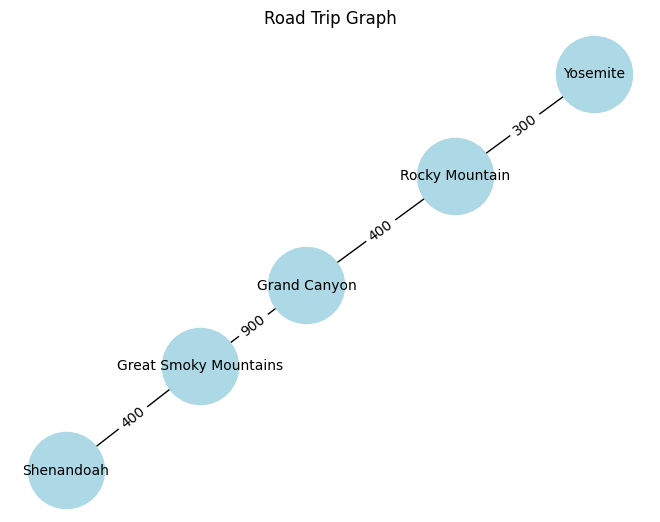

In [3]:
# Graph representation of parks
G = nx.Graph()
G.add_weighted_edges_from([
    ("Yosemite", "Rocky Mountain", 300),
    ("Rocky Mountain", "Grand Canyon", 400),
    ("Grand Canyon", "Great Smoky Mountains", 900),
    ("Great Smoky Mountains", "Shenandoah", 400),
])

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Road Trip Graph")
plt.show()


### 3. Classical Search Algorithms
#### **Breadth-First Search (BFS)**
Breadth-First Search explores nodes level by level. Let's implement BFS to find the shortest path from one park to another.


In [4]:
def bfs(graph, start, goal):
    visited = set()
    queue = [[start]]

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node == goal:
            return path

        elif node not in visited:
            for neighbor in graph[node]:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

            visited.add(node)

# Example usage
graph = {
    "Yosemite": ["Rocky Mountain"],
    "Rocky Mountain": ["Yosemite", "Grand Canyon"],
    "Grand Canyon": ["Rocky Mountain", "Great Smoky Mountains"],
    "Great Smoky Mountains": ["Grand Canyon", "Shenandoah"],
    "Shenandoah": []
}
print("BFS Path:", bfs(graph, "Yosemite", "Shenandoah"))


BFS Path: ['Yosemite', 'Rocky Mountain', 'Grand Canyon', 'Great Smoky Mountains', 'Shenandoah']


#### **A* Search Algorithm**
A* is an informed search algorithm that uses both path cost and heuristic estimates to find an optimal solution.


In [5]:
from heapq import heappop, heappush

def a_star(graph, start, goal, heuristic):
    open_set = []
    heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while open_set:
        current_cost, current_node = heappop(open_set)

        if current_node == goal:
            path = []
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            return path[::-1]

        for neighbor, weight in graph[current_node].items():
            tentative_g_score = g_score[current_node] + weight
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, goal)
                heappush(open_set, (f_score, neighbor))

# Define heuristic (example: straight-line distance)
def heuristic(node, goal):
    heuristic_values = {
        "Yosemite": 6,
        "Rocky Mountain": 4,
        "Grand Canyon": 2,
        "Great Smoky Mountains": 1,
        "Shenandoah": 0
    }
    return heuristic_values[node]

# Example usage
graph_with_weights = {
    "Yosemite": {"Rocky Mountain": 300},
    "Rocky Mountain": {"Yosemite": 300, "Grand Canyon": 400},
    "Grand Canyon": {"Rocky Mountain": 400, "Great Smoky Mountains": 900},
    "Great Smoky Mountains": {"Grand Canyon": 900, "Shenandoah": 400},
    "Shenandoah": {}
}
print("A* Path:", a_star(graph_with_weights, "Yosemite", "Shenandoah", heuristic))


A* Path: ['Yosemite', 'Rocky Mountain', 'Grand Canyon', 'Great Smoky Mountains', 'Shenandoah']


### 4. Adversarial Search and Game Theory
Adversarial search is crucial for games where multiple agents are competing, such as chess or tic-tac-toe. We use algorithms like Minimax for decision-making in such situations.

#### **Example: Minimax Algorithm**
Implement a simplified version of the minimax algorithm to simulate decision-making for a simple game like Tic-Tac-Toe.


In [6]:
# DO NOT RUN JUST AN EXAMPLE
def minimax(state, depth, maximizing_player):
    if depth == 0 or game_over(state):
        return evaluate_state(state)

    if maximizing_player:
        max_eval = float('-inf')
        for child in get_children(state):
            eval = minimax(child, depth - 1, False)
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for child in get_children(state):
            eval = minimax(child, depth - 1, True)
            min_eval = min(min_eval, eval)
        return min_eval


To demonstrate the minimax algorithm, let's implement a simple version for a Tic-Tac-Toe game.


In [8]:
# Simplified Tic-Tac-Toe Implementation

def game_over(state):
    # Check if the game is over
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (0, 3, 6), (1, 4, 7), (2, 5, 8), (0, 4, 8), (2, 4, 6)]
    for (i, j, k) in winning_combinations:
        if state[i] == state[j] == state[k] and state[i] != ' ':
            return True
    return ' ' not in state

def evaluate_state(state):
    # Evaluation function for minimax
    winning_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (0, 3, 6), (1, 4, 7), (2, 5, 8), (0, 4, 8), (2, 4, 6)]
    for (i, j, k) in winning_combinations:
        if state[i] == state[j] == state[k]:
            if state[i] == 'X':
                return 1
            elif state[i] == 'O':
                return -1
    return 0

def get_children(state, player):
    # Generate all possible child states
    children = []
    for i in range(len(state)):
        if state[i] == ' ':
            new_state = state[:i] + player + state[i+1:]
            children.append(new_state)
    return children

def minimax(state, depth, maximizing_player):
    if depth == 0 or game_over(state):
        return evaluate_state(state)

    if maximizing_player:
        max_eval = float('-inf')
        for child in get_children(state, 'X'):
            eval = minimax(child, depth - 1, False)
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for child in get_children(state, 'O'):
            eval = minimax(child, depth - 1, True)
            min_eval = min(min_eval, eval)
        return min_eval

# Example usage
initial_state = "XOX O X  "
print("Minimax Evaluation:", minimax(initial_state, 3, True))


Minimax Evaluation: 1


### 5. Constraint Satisfaction Problems
Constraint satisfaction involves solving problems where variables must be assigned values that satisfy specific constraints. Examples include scheduling, map coloring, and puzzles like Sudoku.



#### **Example: Scheduling**
We have a list of lectures that need to be scheduled at certain time slots. Each lecture requires a specific professor and a room


In [51]:
# Lectures, Professors, and Rooms
lectures = ["AI Algorithms and Applications with Python",
            "Advanced AI Algorithms and Applications with Python",
            "Digital Business",
            "IT-Project Management",
            "AI Capstone Project"]

professors = {
    "AI Algorithms and Applications with Python": "Dr. Dominik Jung",
    "Advanced AI Algorithms and Applications with Python": "Dr. Dominik Jung",
    "Digital Business": "Prof. Dr. Peter Buxmann",
    "IT-Project Management": "Prof. Dr. Peter Buxmann",
    "AI Capstone Project": "Dr. Timo Sturm"
}
rooms = ["Room 1", "Room 2"]

# Time slots for scheduling
time_slots = ["Slot 1", "Slot 2"]
#time_slots = ["Slot 1", "Slot 2", "Slot 3"]


# Function to check if a schedule assignment is valid
def is_valid_schedule(schedule):
    for (lecture1, time1) in schedule.items():
        for (lecture2, time2) in schedule.items():
            if lecture1 != lecture2:
                # Check if the same professor is teaching at the same time
                if professors[lecture1] == professors[lecture2] and time1 == time2:
                    return False
                # Check if the same room is assigned at the same time
                if schedule[lecture1][1] == schedule[lecture2][1] and time1 == time2:
                    return False
    return True

# Backtracking function to solve the scheduling problem
def solve_scheduling(lectures, time_slots, rooms, schedule={}):
    if len(schedule) == len(lectures):
        return schedule

    # Select the next lecture to assign
    unassigned = [lec for lec in lectures if lec not in schedule]
    current_lecture = unassigned[0]

    # Try each time and room combination
    for time in time_slots:
        for room in rooms:
            schedule[current_lecture] = (time, room)
            print(f"Trying {current_lecture} in {time}, {room} -> Schedule: {schedule}")
            if is_valid_schedule(schedule):
                result = solve_scheduling(lectures, time_slots, rooms, schedule)
                if result:
                    return result
            # Backtracking: Remove the assignment if not valid
            schedule.pop(current_lecture)
            print(f"Backtracking on {current_lecture} in {time}, {room}")

    return None

# Calculate the solution
solution = solve_scheduling(lectures, time_slots, rooms)
print("Scheduling Solution:", solution)


Trying AI Algorithms and Applications with Python in Slot 1, Room 1 -> Schedule: {'AI Algorithms and Applications with Python': ('Slot 1', 'Room 1')}
Trying Advanced AI Algorithms and Applications with Python in Slot 1, Room 1 -> Schedule: {'AI Algorithms and Applications with Python': ('Slot 1', 'Room 1'), 'Advanced AI Algorithms and Applications with Python': ('Slot 1', 'Room 1')}
Backtracking on Advanced AI Algorithms and Applications with Python in Slot 1, Room 1
Trying Advanced AI Algorithms and Applications with Python in Slot 1, Room 2 -> Schedule: {'AI Algorithms and Applications with Python': ('Slot 1', 'Room 1'), 'Advanced AI Algorithms and Applications with Python': ('Slot 1', 'Room 2')}
Trying Digital Business in Slot 1, Room 1 -> Schedule: {'AI Algorithms and Applications with Python': ('Slot 1', 'Room 1'), 'Advanced AI Algorithms and Applications with Python': ('Slot 1', 'Room 2'), 'Digital Business': ('Slot 1', 'Room 1')}
Backtracking on Digital Business in Slot 1, Room 

### 6. Practical Exercises
- **Exercise 1**: Implement the Hill-Climbing search algorithm for the Road Trip problem.
- **Exercise 2**: Model a new search problem involving warehouse robot navigation and solve it using BFS or A*.
- **Exercise 3**: Implement and experiment with the Genetic Algorithm for solving the Traveling Salesperson Problem.


## Resources for Further Learning
- Official Python documentation: https://docs.python.org/3/
- NumPy documentation: https://numpy.org/doc/
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/
- Scikit-learn documentation: https://scikit-learn.org/stable/
- TensorFlow documentation (for deep learning): https://www.tensorflow.org/
- Hands-on Machine Learning with Scikit-learn, Keras, and TensorFlow by Aurélien Géron
